**IMPORTING THE RELEVANT PACKAGES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

**IMPORTING THE DATASET**

In [2]:
WINE_dataset = pd.read_csv("/content/drive/MyDrive/Wine_quality_data.csv")

# loading the dataset to a pandas dataframe

**EXPLORING THE DATASET**

In [3]:
WINE_dataset.head()

# printing the first 5 rows of the dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
WINE_dataset.shape

# no. of rows and columns in the dataset

(1599, 12)

In [5]:
WINE_dataset.isnull().sum()               

#we can see there is no null value 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
WINE_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
WINE_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**EXPLORATORY DATA ANALYSIS**

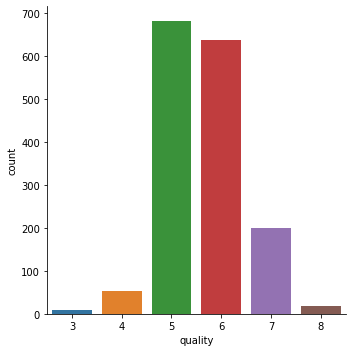

In [8]:
sns.catplot(x="quality" , data=WINE_dataset,kind="count")

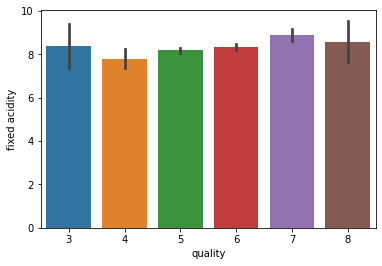

In [9]:
plot = plt.figure(figsize=(6,4))
sns.barplot(x = "quality" , y = "fixed acidity" , data=WINE_dataset)

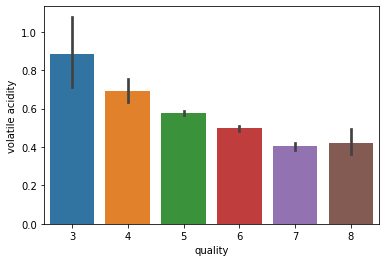

In [11]:
plot = plt.figure(figsize=(6,4))
sns.barplot(x = "quality" , y = "volatile acidity" , data=WINE_dataset)

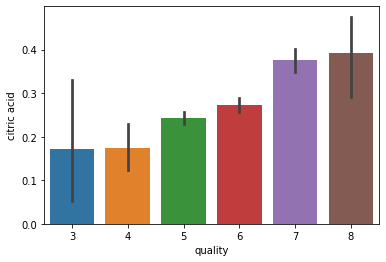

In [12]:
plot = plt.figure(figsize=(6,4))
sns.barplot(x = "quality" , y = "citric acid" , data=WINE_dataset)

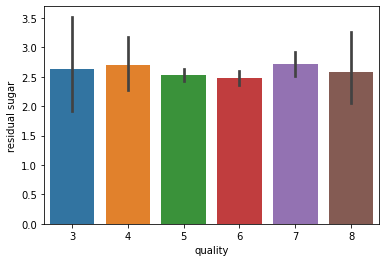

In [13]:
plot = plt.figure(figsize=(6,4))
sns.barplot(x = "quality" , y = "residual sugar" , data=WINE_dataset)

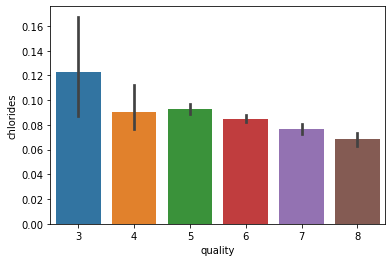

In [14]:
plot = plt.figure(figsize=(6,4))
sns.barplot(x = "quality" , y = "chlorides" , data=WINE_dataset)

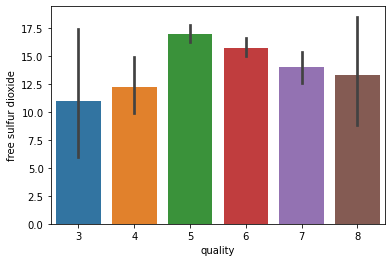

In [15]:
plot = plt.figure(figsize=(6,4))
sns.barplot(x = "quality" , y = "free sulfur dioxide" , data=WINE_dataset)

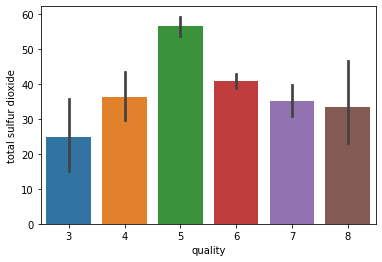

In [16]:
plot = plt.figure(figsize=(6,4))
sns.barplot(x = "quality" , y = "total sulfur dioxide" , data=WINE_dataset)

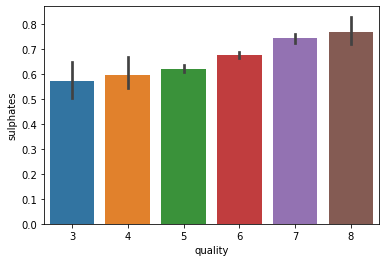

In [17]:
plot = plt.figure(figsize=(6,4))
sns.barplot(x = "quality" , y = "sulphates" , data=WINE_dataset)

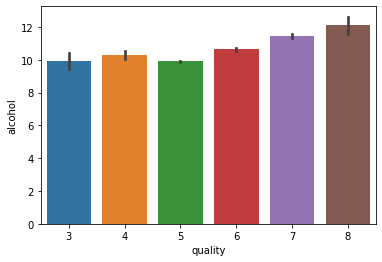

In [18]:
plot = plt.figure(figsize=(6,4))
sns.barplot(x = "quality" , y = "alcohol" , data=WINE_dataset)

**HEATMAP**

In [19]:
Correlation = WINE_dataset.corr()

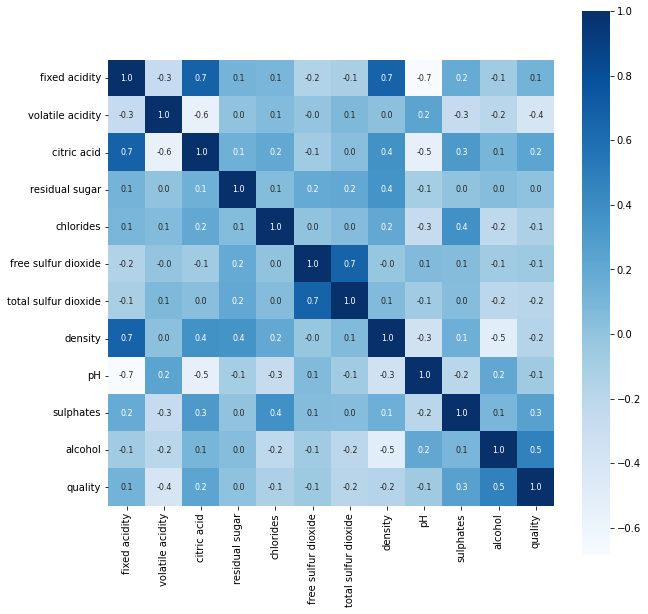

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(Correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap= "Blues")

**DATA PREPROCESSING**

In [21]:
X = WINE_dataset.drop('quality', axis=1)

In [22]:
print(X)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1596            6.3             0.510         0.13  ...  3.42       0.75     11.0
1597            5.9             0.645         0.12  ...  3.57       0.71     10.2
1598            6.0             0.310         0.47  ...  3.39       0.66     11.0

[1599 rows x 11

In [23]:
Y = WINE_dataset['quality'].apply(lambda y_value:1 if y_value>=7 else 0)

In [24]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


**DATA IS SPLITTED INTO TRAINING AND TEST DATA**

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=3)

In [26]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


**MODEL TRAINING**

In [27]:
Model = RandomForestClassifier()

In [28]:
Model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**ACCURACY SCORE**

In [29]:
X_test_prediction = Model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [30]:
print("Accuracy score: ", test_data_accuracy * 100)

Accuracy score:  92.8125


**TEST CASE**

In [31]:
Test_data = (7.5,0.5,0.36,6.2,0.071,102.2,17.0,0.9978,10.5,3.35,0.8)
Test_data_as_numpy_array = np.asarray(Test_data)
Test_data_reshaped = Test_data_as_numpy_array.reshape(1,-1)

Prediction = Model.predict(Test_data_reshaped)
print(Prediction)
if (Prediction[0] == 1):
  print('Good quality wine')
else:
  print('Bad quality wine')

   

[0]
Bad quality wine
